In [75]:

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import numpy as np

In [76]:
np.random.normal(loc=10, scale=10)

-3.2511128342782847

**Grupo 1.** Edad media; ingenieros, doctores y abogados; salario elevado; casados; gastan mucho
**Grupo 2.** Jovenes; 

In [89]:
import numpy as np
import pandas as pd

def create_ever_married(age):
    if 25 <= age <= 35:
        return np.random.choice(["yes", "no"], p=[0.2, 0.8])
    elif 35 < age <= 45:
        return np.random.choice(["yes", "no"], p=[0.45, 0.55])
    elif 45 < age <= 55:
        return np.random.choice(["yes", "no"], p=[0.6, 0.4])
    else:
        return np.random.choice(["yes", "no"], p=[0.85, 0.15])

professions = ['Engineer', 'Doctor', 'Lawyer', 'Teacher', 'Entertainment', 'Executive']
def create_profession(row):
    gender = row["gender"]
    ever_married = row["ever_married"]
    if gender == "female":
        if ever_married == "yes":
            return np.random.choice(['Engineer', 'Doctor', 'Lawyer', 'Teacher', 'Entertainment', 'Executive'],
                                    p=[0.15, 0.2, 0.15, 0.2, 0.15, 0.15])
        else:
            return np.random.choice(['Engineer', 'Doctor', 'Lawyer', 'Teacher', 'Entertainment', 'Executive'],
                                    p=[0.15, 0.2, 0.15, 0.2, 0.15, 0.15])
    else:
        if ever_married == "yes":
            return np.random.choice(['Engineer', 'Doctor', 'Lawyer', 'Teacher', 'Entertainment', 'Executive'],
                                    p=[0.2, 0.15, 0.15, 0.15, 0.15, 0.2])
        else:
            return np.random.choice(['Engineer', 'Doctor', 'Lawyer', 'Teacher', 'Entertainment', 'Executive'],
                                    p=[0.2, 0.15, 0.15, 0.15, 0.15, 0.2])


def create_work_experience(row):
    age = row["age"]
    gender = row["gender"]
    profession = row["profession"]
    base_experience = age // 4
    if gender == "female":
        base_experience += np.random.normal(loc=0.5, scale=0.5)
    else:
        base_experience += np.random.normal(loc=1, scale=0.5)
    
    # Ajustando la experiencia basada en la profesión
    if profession == "Engineer":
        base_experience += np.random.normal(loc=3, scale=0.25)
    elif profession == "Doctor":
        base_experience += np.random.normal(loc=2, scale=0.25)
    elif profession == "Lawyer":
        base_experience += np.random.normal(loc=2, scale=0.25)
    elif profession == "Teacher":
        base_experience += np.random.normal(loc=3, scale=0.25)
    elif profession == "Entertainment":
        base_experience += np.random.normal(loc=1, scale=0.25)
    elif profession == "Executive":
        base_experience += np.random.normal(loc=2, scale=0.25)
    
    return max(min(base_experience, age-16), 0)  # Asegurando que la experiencia no sea mayor que la edad

def create_salary(row):
    work_experience = row["work_experience"]
    age = row["age"]
    profession = row["profession"]
    gender = row["gender"]
    ever_married = row["ever_married"]
    
    # Ajustando el salario basado en la profesión
    if profession == "Engineer":
        salary = np.random.normal(loc=20000 + 500*work_experience + 200*age - age**2, scale=2000)
        salary += np.random.normal(loc=6000, scale=1500)
    elif profession == "Doctor":
        salary = np.random.normal(loc=20000 + 300*work_experience + 100*age - age**2, scale=2000)
        salary += np.random.normal(loc=11000, scale=900)
    elif profession == "Lawyer":
        salary = np.random.normal(loc=20000 + 600*work_experience + 100*age - age**2, scale=2000)
        salary += np.random.normal(loc=6000, scale=1500)
        salary += np.random.choice([0, 10000], p=[0.8, 0.2])
    elif profession == "Teacher":
        salary = np.random.normal(loc=20000 + 100*work_experience + 100*age - age**2, scale=2000)
        salary += np.random.normal(loc=3250, scale=600)
    elif profession == "Entertainment":
        salary = np.random.normal(loc=15000 + 50*work_experience + 10*age - age**2, scale=2000)
        salary += np.random.normal(loc=500, scale=3500)
        salary += np.random.choice([0, 20000], p=[0.95, 0.05])
    elif profession == "Executive":
        salary = np.random.normal(loc=25000 + 700*work_experience + 200*age - age**2, scale=2000)
        salary += np.random.normal(loc=13000, scale=3200)
        salary += np.random.choice([0, 20000], p=[0.8, 0.2])
    
    # Ajustando el salario basado en el género y el estado civil
    if gender == "female":
        salary += np.random.normal(loc=0, scale=1000)
    else:
        salary += np.random.normal(loc=0, scale=2500)
    
    if ever_married == "yes":
        salary += np.random.normal(loc=0, scale=500)
    else:
        salary += np.random.normal(loc=500, scale=1000)
    
    return max(salary, 0)  # Asegurar que el salario no sea negativo

def create_graduated(row):
    work_experience = row["work_experience"]
    age = row["age"]
    profession = row["profession"]
    gender = row["gender"]
    ever_married = row["ever_married"]
    # Probabilidad base de graduarse
    graduation_probability = 0.1
    # Ajustar la probabilidad basada en la edad y la experiencia laboral
    if age >= 30:
        graduation_probability += 0.1
    
    # Ajustar la probabilidad basada en la profesión
    if profession in ['Doctor', "Teacher"]:
        graduation_probability += 0.3
    elif profession in ["Lawyer", "Executive"]:
        graduation_probability += 0.2
    else:
        graduation_probability += 0.05

    
    # Simular si la persona se ha graduado o no
    graduated = np.random.choice([True, False], p=[graduation_probability, 1-graduation_probability])
    
    return graduated

def create_family_size(row):
    return int(np.random.normal(loc=4, scale=2))

def create_spending_score(row):
    salary = row["salary"]
    gender = row["gender"]
    profession = row["profession"]
    age = row["age"]
    ever_married = row["ever_married"]
    graduated = row["doctorated"]
    family_size = row["family_size"]

    # Factor base basado en el salario
    score = min(100, max(1, np.random.normal(loc=salary/1000-5, scale=15)))
    
    # Ajustes basados en el género
    if gender == "male":
        score += np.random.normal(loc=5, scale=2)
    else:
        score += np.random.normal(loc=3, scale=1)
    
    # Ajustes basados en la profesión
    if profession in ["Executive", "Doctor", "Lawyer"]:
        score += np.random.normal(loc=6, scale=2)
    else:
        score += np.random.normal(loc=2, scale=1)
    
    # Ajustes basados en la edad
    if age < 30:
        score += np.random.normal(loc=1, scale=2)
    elif 30 <= age <= 50:
        score += np.random.normal(loc=2, scale=2)
    else:
        score += np.random.normal(loc=3, scale=2)
    
    # Ajustes basados en el estado civil y educación
    if ever_married == "yes":
        score += np.random.normal(loc=3, scale=2)
    if graduated:
        score += np.random.normal(loc=0, scale=1)
    
    if family_size>5:
        score += np.random.normal(loc=7, scale=1)
    
    score = min(100, max(1, score))

    if score <=20:
        return "very low"
    elif score <=40:
        return "low"
    elif score <=60:
        return "medium"
    elif score <= 80:
        return "high"
    else:
        return "very high"

def generate_data(num_samples):
    df = pd.DataFrame()
    df["gender"] = pd.Series(np.random.choice(["male", "female"], size=num_samples, p=[0.62, (1 - 0.62)]))
    df["age"] = np.random.randint(25, 64, size=num_samples)
    df["ever_married"] = df["age"].apply(create_ever_married)
    df["profession"] = df[["gender", "ever_married"]].apply(create_profession, axis=1)
    df["work_experience"] = df.apply(create_work_experience, axis=1).astype(int)
    df["salary"] = df.apply(create_salary, axis=1).astype(int)
    df["doctorated"] = df.apply(create_graduated, axis=1)
    df["family_size"] = df.apply(create_family_size, axis=1)
    df["spending_score"] = df.apply(create_spending_score, axis=1)
    return df

data = generate_data(8000)
data


,gender,age,ever_married,profession,work_experience,salary,doctorated,family_size,spending_score
0,female,53,yes,Executive,15,52984,False,5,medium
1,female,27,no,Executive,6,47274,False,4,medium
2,male,45,no,Engineer,16,38693,False,2,medium
3,male,63,yes,Engineer,18,44505,False,4,low
4,male,42,yes,Teacher,13,32455,False,5,low
...,...,...,...,...,...,...,...,...,...
7995,female,39,no,Executive,11,73399,True,1,high
7996,male,37,no,Entertainment,10,14559,False,2,very low
7997,male,36,yes,Entertainment,11,19117,False,6,low
7998,male,26,no,Lawyer,8,32466,False,1,very low


<Axes: xlabel='work_experience', ylabel='salary'>

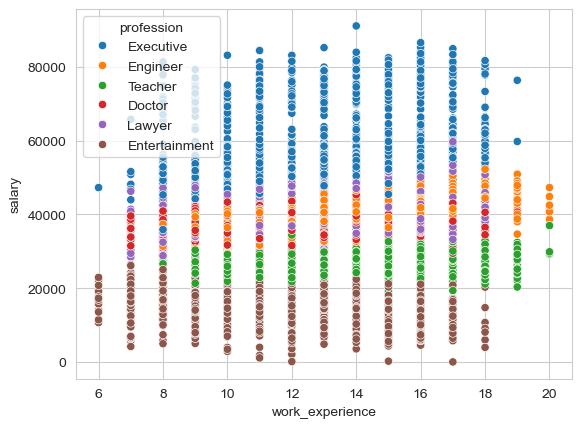

In [96]:
sns.scatterplot(x=data["work_experience"], y=data["salary"], hue=data["profession"])

<Axes: ylabel='salary'>

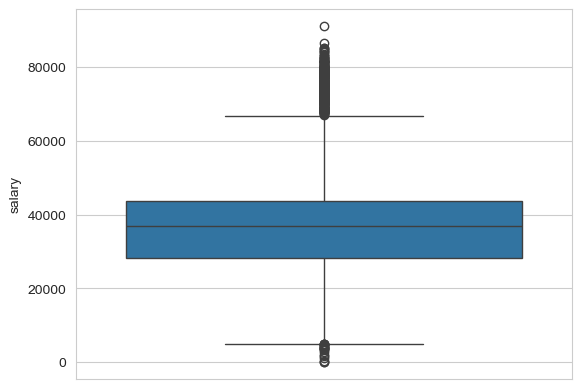

In [97]:
sns.boxplot(data["salary"])

In [93]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
kmeans = KMeans(n_clusters=6).fit(MinMaxScaler().fit_transform(pd.get_dummies(data)))
clusters = kmeans.predict(MinMaxScaler().fit_transform(pd.get_dummies(data)))
data["cluster"] = clusters

In [94]:
data.groupby("cluster")["profession"].value_counts(normalize=True)

cluster  profession   
0        Entertainment    0.260734
         Teacher          0.210773
         Engineer         0.207650
         Doctor           0.160812
         Lawyer           0.152225
         Executive        0.007806
1        Teacher          0.196256
         Doctor           0.188509
         Executive        0.162686
         Engineer         0.153648
         Entertainment    0.151065
         Lawyer           0.147837
2        Engineer         0.261792
         Doctor           0.211085
         Lawyer           0.192217
         Teacher          0.139151
         Executive        0.135613
         Entertainment    0.060142
3        Engineer         0.246533
         Entertainment    0.191063
         Lawyer           0.190036
         Doctor           0.189522
         Teacher          0.182332
         Executive        0.000514
4        Doctor           0.215139
         Teacher          0.194555
         Executive        0.152058
         Entertainment    0.1487

In [60]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=3)
components = pca.fit_transform(MinMaxScaler().fit_transform(pd.get_dummies(data)))

In [61]:
pca.explained_variance_ratio_.sum()

0.4768413206261508

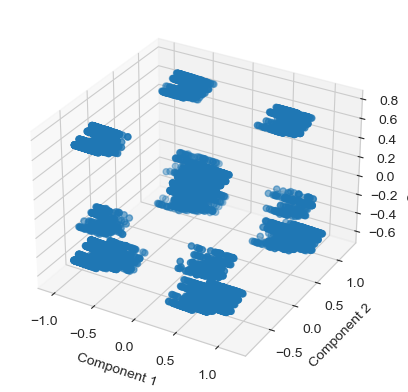

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler

# Supongamos que 'data' es tu conjunto de datos

# Escalamos los datos
scaled_data = MinMaxScaler().fit_transform(pd.get_dummies(data))

# Realizamos PCA
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_data)

# Creamos un DataFrame con las componentes principales
components_df = pd.DataFrame(components, columns=['Component 1', 'Component 2', 'Component 3'])

# Creamos la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficamos las componentes en 3D
ax.scatter(components_df['Component 1'], components_df['Component 2'], components_df['Component 3'])

# Etiquetamos los ejes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Mostramos el gráfico
plt.show()


In [70]:
MinMaxScaler().fit_transform(pd.get_dummies(data))

array([[0.92105263, 0.8       , 0.4393262 , ..., 0.        , 0.        ,
        0.        ],
       [0.71052632, 0.66666667, 0.43111825, ..., 0.        , 0.        ,
        0.        ],
       [0.39473684, 0.4       , 0.34022174, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.2       , 0.32451174, ..., 0.        , 0.        ,
        0.        ],
       [0.68421053, 0.6       , 0.49394439, ..., 0.        , 0.        ,
        0.        ],
       [0.78947368, 0.53333333, 0.55876369, ..., 1.        , 0.        ,
        0.        ]])

14935.186068042818

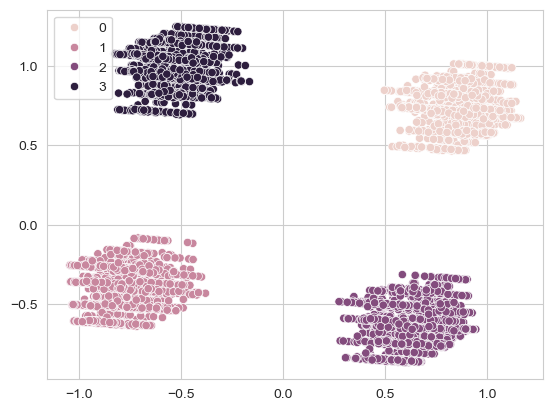

In [74]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4).fit(MinMaxScaler().fit_transform(pd.get_dummies(data)))
clusters = kmeans.predict(MinMaxScaler().fit_transform(pd.get_dummies(data)))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=clusters)
kmeans.inertia_

<Axes: ylabel='salary'>

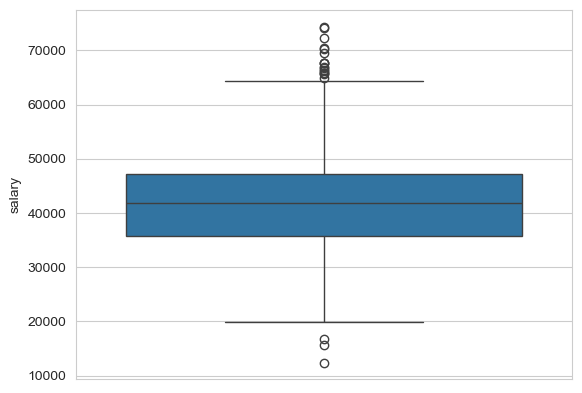

In [20]:
sns.boxplot(data["salary"])

In [41]:
data.groupby("age")["salary"].mean()

age
25    43150.967568
26    43035.775610
27    43558.618421
28    44458.105528
29    44071.934884
30    43948.635000
31    44852.449198
32    45126.974619
33    46066.603352
34    45170.668367
35    45677.615023
36    46627.038462
37    45164.793578
38    45379.298755
39    47169.765000
40    47016.274038
41    46658.139896
42    47030.835106
43    47916.646226
44    47907.513889
45    48541.763033
46    48287.611111
47    48387.492683
48    48782.433476
49    49244.818627
50    49015.231132
51    48404.791667
52    48987.917431
53    51250.638889
54    49069.112195
55    49939.760000
56    49779.092233
57    51128.069519
58    50036.167421
59    51087.449495
60    52046.720183
61    51283.377990
62    51925.806283
63    51198.966019
Name: salary, dtype: float64

In [ ]:
from sklearn.cluster import KMeans



In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score
X = pd.get_dummies(data.drop("salary", axis="columns"))
y = data["salary"]
lin_reg = RandomForestRegressor().fit(X, y)
y_pred = lin_reg.predict(X)
mean_absolute_percentage_error(y_pred=y_pred, y_true=y)*100, r2_score(y_pred=y_pred, y_true=y)

(4.193826967975001, 0.8901203322544907)

In [91]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=5).fit(pd.get_dummies(data))

clusters = k_means.predict(pd.get_dummies(data))
data["clusters"] = clusters

In [98]:
data.groupby("clusters")["profession"].value_counts()

clusters  profession   
0         Engineer         685
          Artist           337
          Lawyer           320
          Doctor           298
          Healthcare       261
          Executive        123
          Homemaker         33
          Entertainment     15
1         Artist           532
          Engineer         471
          Healthcare       367
          Entertainment    186
          Lawyer           145
          Doctor           140
          Homemaker         68
          Executive         14
2         Engineer         236
          Doctor           160
          Executive        142
          Lawyer           107
          Artist            75
          Healthcare        75
          Homemaker          4
          Entertainment      1
3         Engineer         728
          Artist           584
          Healthcare       364
          Doctor           305
          Lawyer           258
          Entertainment     76
          Homemaker         51
          Execu

In [94]:
data.groupby("clusters")[["salary", "age", "family_size"]].describe().T

clusters                      0             1             2             3  \
salary      count   2072.000000   1923.000000    800.000000   2407.000000   
            mean   39364.548263  30788.970359  44867.007500  35080.693810   
            std     1363.927602   1403.444317   2455.361351   1236.201380   
            min    37220.000000  27948.000000  42113.000000  32935.000000   
            25%    38215.250000  29650.000000  43063.000000  34038.000000   
            50%    39223.000000  30951.000000  44228.500000  35080.000000   
            75%    40474.500000  32011.000000  45998.750000  36151.000000   
            max    42107.000000  32930.000000  56580.000000  37215.000000   
age         count   2072.000000   1923.000000    800.000000   2407.000000   
            mean      48.077703     39.674987     53.208750     43.335688   
            std       10.626545     10.281366      8.265323     10.850468   
            min       25.000000     25.000000     25.000000     25.000000   
            25%       40.000000     31.000000     49.000000     34.000000   
            50%       50.000000     38.000000     55.000000     43.000000   
            75%       57.000000     47.000000     60.000000     52.000000   
            max       63.000000     63.000000     63.000000     63.000000   
family_size count   2072.000000   1923.000000    800.000000   2407.000000   
            mean       4.425193      3.613105      5.087500      3.958039   
            std        1.719096      1.598671      1.601734      1.654079   
            min        1.000000      1.000000      1.000000      1.000000   
            25%        3.000000      2.000000      4.000000      3.000000   
            50%        4.000000      3.000000      5.000000      4.000000   
            75%        6.000000      5.000000      6.000000      5.000000   
            max        9.000000      9.000000      9.000000      8.000000   

clusters                      4  
salary      count    798.000000  
            mean   25102.020050  
            std     2415.517681  
            min    15446.000000  
            25%    23894.250000  
            50%    25681.000000  
            75%    26991.750000  
            max    27911.000000  
age         count    798.000000  
            mean      35.280702  
            std        8.552966  
            min       25.000000  
            25%       28.000000  
            50%       33.000000  
            75%       40.000000  
            max       63.000000  
family_size count    798.000000  
            mean       3.154135  
            std        1.480971  
            min        1.000000  
            25%        2.000000  
            50%        3.000000  
            75%        4.000000  
            max        8.000000

<Axes: xlabel='work_experience', ylabel='salary'>

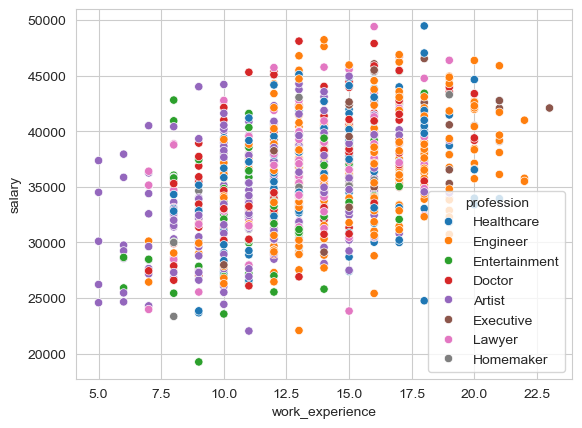

In [61]:
sns.scatterplot(x=data["work_experience"], y=data["salary"], hue=data["profession"])

In [36]:
import pandas as pd
import numpy as np

def categorize_spending_score(score):
    if score < 40:
        return 'low'
    elif score < 60:
        return 'average'
    elif score < 80:
        return 'high'
    else:
        return 'super-high'

def generate_work_experience(age, profession):
    base_experience = age // 5  # Experiencia base relacionada con la edad
    if profession == 'Doctor':
        return base_experience + np.random.randint(0, 10)
    elif profession == 'Engineer':
        return base_experience + np.random.randint(0, 5)
    elif profession == 'Executive':
        return base_experience + np.random.randint(5, 15)
    else:
        return base_experience + np.random.randint(0, 5)

def generate_data(num_samples):
    # Generar datos para Gender
    gender = np.random.choice(['male', 'female'], size=num_samples)
    
    
    # Generar datos para Ever_Married
    ever_married_prob = [0.7, 0.3]  # Probabilidad de 'yes' y 'no'
    ever_married = np.random.choice(['yes', 'no'], size=num_samples, p=ever_married_prob)
    
    # Generar datos para Age
    age = np.random.randint(25, 59, size=num_samples)
    
    # Generar datos para Graduated
    graduated_prob = [0.6, 0.4]  # Probabilidad de '1' y '0'
    graduated = np.random.choice([1, 0], size=num_samples, p=graduated_prob)
    
    # Generar datos para Profession
    professions = ['Engineer', 'Doctor', 'Artist', 'Homemaker', 'Lawyer', 'Healthcare', 'Entertainment', 'Executive']
    profession = np.random.choice(professions, size=num_samples)
    
    # Generar datos para Work_Experience
    work_experience = np.array([generate_work_experience(age[i], profession[i]) for i in range(num_samples)])
    
    # Generar datos para Salary
    salary = np.random.normal(loc=2000 + 50 * age + 0.5*age**2, scale=500, size=num_samples)
    salary += 500 * (profession == 'Doctor')
    salary += 300 * (profession == 'Executive')
    salary += (-500) * (profession == "Artist")
    salary = np.clip(salary, a_min=6000, a_max=None)  # Asegurar que el salario no sea negativo
    
    # Generar datos para Spending_Score
    spending_score_male = np.random.normal(loc=0.8 * salary + 20, scale=10)
    spending_score_female = np.random.normal(loc=0.6 * salary + 10, scale=10)
    spending_score = np.where(gender == 'male', spending_score_male, spending_score_female)
    
    # Convertir Spending_Score en una variable categórica
    ##spending_score_category = np.array([categorize_spending_score(score) for score in spending_score])
    
    # Generar datos para Family_Size
    family_size = np.random.randint(1, 10, size=num_samples)
    
    # Crear DataFrame con los datos generados
    df = pd.DataFrame({
        'Gender': gender,
        'Ever_Married': ever_married,
        'Age': age,
        'Graduated': graduated,
        'Profession': profession,
        'Work_Experience': work_experience,
        'Salary': salary.astype(int),
        'Spending_Score': spending_score,
        'Family_Size': family_size
    })
    
    return df

# Generar datos con 1000 muestras
data = generate_data(1000)
data


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Salary,Spending_Score,Family_Size
0,male,yes,33,0,Executive,18,4548,3661.489279,7
1,male,yes,42,0,Homemaker,8,4854,3901.834428,1
2,female,yes,29,1,Doctor,10,4998,3007.339679,5
3,male,yes,42,0,Doctor,11,5821,4672.511551,1
4,male,no,53,0,Homemaker,12,6742,5432.384177,1
...,...,...,...,...,...,...,...,...,...
995,male,yes,29,0,Entertainment,5,4101,3296.652098,4
996,male,yes,41,0,Doctor,15,5935,4780.886994,5
997,female,yes,52,0,Entertainment,13,6134,3703.122616,7
998,female,yes,55,0,Executive,21,6668,4019.800304,9


In [25]:
data["Spending_Score"].unique()

array([100.])

<Axes: xlabel='Age', ylabel='Salary'>

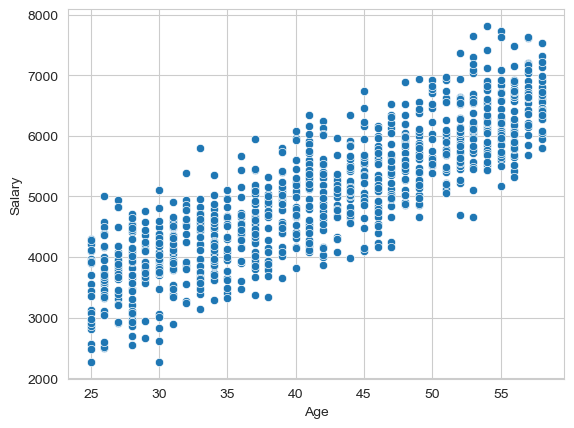

In [34]:
sns.scatterplot(x=data["Age"], y=data["Salary"])

In [21]:
data.groupby("Profession")["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Profession,,,,,,,,
Artist,133.0,4077.954887,1010.997114,1986.0,3352.00,4022.0,4815.00,6662.0
Doctor,127.0,4949.173228,1096.867170,2623.0,4187.00,4891.0,5745.00,7579.0
Engineer,119.0,4447.731092,1014.775200,2373.0,3663.00,4418.0,5166.50,6791.0
Entertainment,116.0,4314.724138,1065.189582,2008.0,3521.25,4398.5,5125.25,6417.0
Executive,125.0,4728.656000,1078.606651,1834.0,3938.00,4891.0,5513.00,7308.0
Healthcare,114.0,4215.570175,981.808851,2189.0,3552.50,4187.5,4914.00,6281.0
Homemaker,126.0,4512.976190,949.720249,1802.0,3779.00,4538.5,5292.00,6282.0
Lawyer,140.0,4286.535714,970.298251,2085.0,3542.00,4248.0,5104.75,6417.0


In [13]:
df = pd.read_csv("df_TFM.csv")
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Salary', 'Spending_Score', 'Family_Size'],
      dtype='object')

In [11]:
df.groupby("Occupation")["Income Level"].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Artist,5666.0,84224.489764,36284.261485,20001.0,52332.25,85252.0,116372.75,149999.0
Doctor,5573.0,82862.251929,36762.279429,20001.0,51532.00,80352.0,116410.00,149999.0
Engineer,5704.0,81515.959677,36603.985875,20001.0,49268.75,78657.5,114197.75,149999.0
Entrepreneur,6636.0,82519.286016,36327.580130,20001.0,52054.25,79229.5,115601.00,149999.0
Lawyer,5775.0,82671.421645,36564.520246,20001.0,51597.50,79494.0,115676.50,149999.0
Manager,5803.0,81889.955368,36952.426138,20001.0,50980.50,78232.0,115779.00,149741.0
Nurse,4521.0,83731.283123,36669.213815,20001.0,52472.00,81128.0,116654.00,149999.0
Salesperson,7919.0,83378.892537,37044.511727,20001.0,51823.50,81798.0,117113.50,149999.0
Teacher,5906.0,82174.043176,36489.598168,20001.0,51488.25,79300.5,115074.50,149999.0


In [6]:
df["Customer ID"].value_counts().head(20)

Customer ID
1         34
100000    15
77821      6
87793      6
3687       6
78538      6
77176      6
88839      6
62716      5
69914      5
73441      5
65233      5
85648      5
67905      5
37770      5
66684      5
5875       5
43991      5
38605      5
88416      5
Name: count, dtype: int64

In [13]:
# No hay demasiados valores nulos; los voy a eliminar
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated            0
Profession         124
Work_Experience      0
Salary             124
Spending_Score       0
Family_Size        335
dtype: int64

In [14]:
df = df.dropna().reset_index(drop=True)

In [19]:
pd.DataFrame(df[["Ever_Married", "Graduated"]].value_counts())

count
Ever_Married Graduated       
Yes          1           3119
No           1           1563
             0           1494
Yes          0           1319